# Group 41 Study on Online Shoppers Purchases

### By Sachleen Parmar, Justin Kim, and Calista Budi

## Introduction

- This data is about online shoppers intentions when purchasing items online. Here is some basic information about it:
The number of observations in the dataset is 12330.
- The number of variables in the dataset is 18.
- **Administrative** is a non-continuous integer that represents how many pages about account management the vistor visited 
- **Administrative_Duration** is a continuous variable representing the total time in seconds spent by the visitor on adminstrative pages
- **Informational** is a non-continuous integer that represents how many pages about Website, communication, and address information management the vistor visited 
- **Information_Duration** is a continuous variable representing the total time in seconds spent by the visitor on informational pages
- **ProductRelated** is a non-continuous integer that represents how many pages about related products the vistor visited
- **ProductRelated_Duration** is a continuous variable representing the total time in seconds spent by the visitor on related product pages
- **BounceRates** is a continuous variable representing the average bounce rate value of pages the visitor visited
- **ExitRates** is a continuous variable representing the average exit rate value of the pages the visitor visited
- **PageValues** is a numerical variable representing the average page value of the pages visited
- **SpecialDay** is a number from 0 to 1 representing how close the visit to the site was to some special holiday (1 being closer to the special holiday)
- **Month** is a categorical variable corresponding with what month the visit date occurred in 
- **OperatingSystems** is a categorical variable representing what operating system the visitor is using
- **Browser** is a categorical variable representing what browser the visitor is using
- **Region** is a categorical variable representing what region the visitor is from
    - Region 1 has 4780 observations.
- **TrafficType** is a categorical variable representing how the visitor arrived on the site.
- **VisitorType** is a string representing whether a visitor has been on the website before (Returning_Visitor), have never been on the website (New_Visitor), or Other
- **Weekend** is a boolean value with TRUE representing it is the weekend and FALSE being it is not
- **Revenue** is a boolean value with TRUE representing making revenue and FALSE representing no revenue made


## Scientific Question
We want to predict whether or not a customer will produce revenue for the website, based on information on them.

## References


&nbsp; Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention<br>
&nbsp; Dataset [Dataset]. UCI Machine Learning Repository.<br>
&nbsp; https://doi.org/10.24432/C5F88Q.
- Used this to get information on the data


In [1]:
install.packages("dplyr")
install.packages("gridExtra")
install.packages("glmnet")
install.packages("pROC")
install.packages("caret")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)
library(dplyr)
library(gridExtra)
library(glmnet)
library(boot)
library(tidymodels)
library(repr)
library(patchwork)
library(MASS)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-10

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ wor

In [3]:
data <-read_delim("https://raw.githubusercontent.com/justkwoo/stat_301_project/refs/heads/main/data/online_shoppers_intention.csv", delim = ",")
head(data)

Rows: 12330 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Month, VisitorType
dbl (14): Administrative, Administrative_Duration, Informational, Informatio...
lgl  (2): Weekend, Revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


Source of Data: &nbsp; Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention<br>
&nbsp; Dataset [Dataset]. UCI Machine Learning Repository.<br>
&nbsp; https://doi.org/10.24432/C5F88Q.

In [4]:
tidy_data <- data %>%
        filter(Region == 1) %>%
        dplyr::select(-Region) %>%
        mutate(
               Browser = as.factor(Browser),
               OperatingSystems = as.factor(OperatingSystems),
               SpecialDay = as.factor(SpecialDay),
               TrafficType = as.factor(TrafficType),
               VisitorType = as.factor(VisitorType),
               Weekend = as.factor(Weekend)
              )
tidy_data

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
0,0,0,0,1,0.0,0.20,0.20,0,0,Feb,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.0,0.00,0.10,0,0,Feb,2,2,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.5,0.02,0.05,0,0,Feb,3,3,4,Returning_Visitor,TRUE,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,0,0,0,5,465.75,0.00000000,0.02133333,0,0,Nov,3,2,8,Returning_Visitor,TRUE,FALSE
0,0,0,0,6,184.25,0.08333333,0.08666667,0,0,Nov,3,2,13,Returning_Visitor,TRUE,FALSE
0,0,0,0,3,21.25,0.00000000,0.06666667,0,0,Nov,3,2,2,New_Visitor,TRUE,FALSE


Because we are doing prediction we are not pre-selecting any variables. However, we removed the Region 1 as this doesn't give us any sort of information.

## Visualization

In [5]:
# Plot A: Scatter plot
filtered_data <- tidy_data |> filter(VisitorType != "Other")

plot_a <- ggplot(filtered_data, aes(x = ProductRelated_Duration,
                                   y = PageValues,
                                   color = Revenue)) +
          geom_point(alpha = 0.5) +
          facet_wrap(~ VisitorType) +
          scale_color_discrete(labels = c("FALSE" = "Did Not Purchase", "TRUE" = "Purchased")) +
          labs(title = "Product Page Engagement vs Page Value by Visitor Type",
               x = "Product Pages (seconds)",
               y = "Page Value",
               color = "Purchase Outcome")

In [6]:
# Plot B: Box plot
plot_b <- ggplot(filtered_data, aes(x = factor(Revenue,
                                              levels = c(FALSE, TRUE),
                                              labels = c("Did Not Purchase", "Purchased")),
                                   y = Informational_Duration,
                                   fill = Revenue)) +
          geom_boxplot(alpha = 0.7) +
          scale_y_log10() +
          labs(title = "Informational Page Duration by Purchase Outcome",
               x = "Purchase Outcome",
               y = "Pages (seconds)")  +
          theme(legend.position = "none")

In [7]:
#Plot C: Bar chart 

plot_c <- ggplot(filtered_data, aes(x = VisitorType, fill = Revenue)) +
          geom_bar(position = "fill") +
          scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
          scale_x_discrete(labels = c("New_Visitor" = "New Visitor", "Returning_Visitor" = "Returning Visitor")) +
          scale_fill_discrete(labels = c("FALSE" = "Did Not Purchase", "TRUE" = "Purchased")) +
          labs(title = "Conversion Rate by Visitor Type",
               x = "Visitor Type",
               y = "Percentage of Sessions",
               fill = "Purchase Outcome")

In [8]:
#Plot D: Density Plot
plot_d <- ggplot(filtered_data, aes(x = ProductRelated_Duration, fill = Revenue)) +
          geom_density(alpha = 0.5) +
          scale_fill_discrete(labels = c("FALSE" = "Did Not Purchase", "TRUE" = "Purchased")) +
          labs(title = "Time Spent on Product Pages by Purchase Outcome",
               x = "Product Pages (seconds)",
               y = "Prop of Sessions",
               fill = "Purchase Outcome") 

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 3799 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


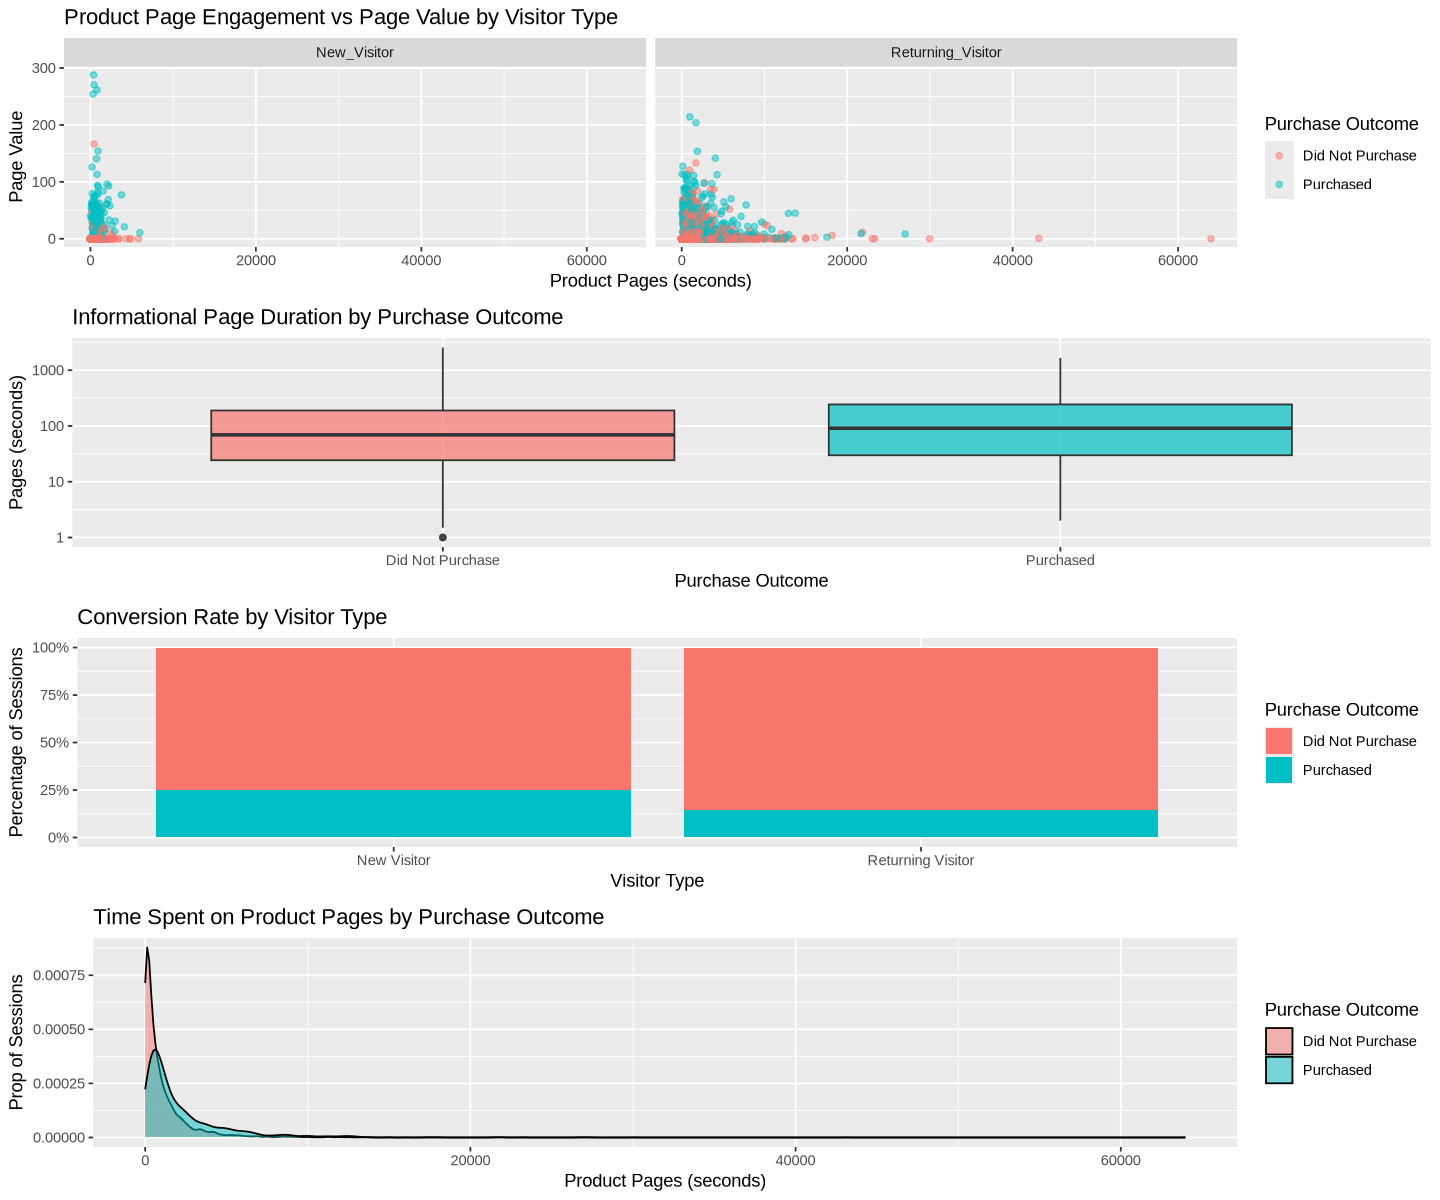

In [9]:
options(repr.plot.width=12, repr.plot.height=10)
grid.arrange(plot_a, plot_b, plot_c, plot_d, nrow = 4)

### Interpretations 

#### Interpretation for Plot A - Scatter Plot
The scatterplot explores whether time spent on product pages relates to page value and whether this pattern differs by visitor type. Across both groups, most sessions cluster at low engagement and low page value, but purchased sessions show noticeably higher page values as compared to non-purchased ones. Overall, the plot suggests that purchase outcome, not visitor type, is the main driver of higher page value, and that product-page duration alone shows a weak relationship with value. 

#### Interpretation for Plot B - Box Plot
The bar plot helps assess whether viewing informational pages is related to purchasing behavior. Purchasers generally spend slightly more time on informational pages compared to non-purchasers, although the time spent is heavily skewed with many short interactions. This indicates that informational content may play a role in supporting conversions, but low engagement levels could be a limitation to investigate further.

#### Interpretation for Plot C - Bar Chart
The bar chart is relevant for identifying whether visitor type influences  conversion likelihood. Returning visitors show a modestly higher conversion rate compared to new visitors, although the majority of both groups do not purchase. This suggests visitor type could be a relevant feature in modeling purchase outcomes, with returning visitors showing stronger purchase intent.

#### Interpretation for Plot D - Density Plot
The density plot examines whether time spent on product pages differs between purchasers and non-purchasers. Both groups show very low time spent on product pages, but purchasers display a slightly longer right-tail, meaning some spend more time compared to non-purchasers. This suggests that while product engagement is generally low, higher time spent may still signal stronger purchase intent.

## Method and Plan

#### Proposed Method
- We will use LASSO and Logistic Regression as the models for revenue prediction
- For Logistic Regression we will use backwards selection using all the covariates; this will allow us to compare and contrast whether LASSO or Backwards Selection does a better job predicting.


#### Why is this method appropriate?:
- The question is logistic regression as we have a classification problem with a binary response. Logistic regression will ensure the values stay between the required range of 0 and 1. 
  - Since the goal of the project is to identify whether we can predict the revenue with low errors on classification metrics with the pre-defined variables mentioned in the question section, bacwkard model selection helps achieving the effective predictor set and classification metrics allow to evaluate the prediction performance.
  - LASSO is commonly used for predictions as it is a less greedy algorithm than backwards selection. 

#### Required Assumptions:
- To apply logistic regression, the response variable `revenue` must be a binary variable, and it must be stored as a `factor` in R.
- Also, logistic regression assumes that there exists a linear relationship between the log-odds of the response variable and the predictors.
- Assume the variance is also follows a Bernoulli random variable, thus the variance should be around p(1-p), where p is the probability of getting revenue.
- Independence

#### Potential Limitations/Weaknesses:
  - Since logistic regression assumes a linear relationship between the log-odds of the response variable and the predictors, it might underperform when the true relationship is weakly linear or non-linear.
  - Moreover, since logistic regression is a very simple model compared to other classificaiton methods such as random forests or neural networks, the performance might not be good enough compared to models with higher complexity.
  - Typically the variance might not act like a Bernoulli random variable, and thus will lead to a bad prediction; we can use an overdispersion parameter such as the one given in quasibinomial to fix this. 

## Backwards Selection

In [10]:
# set seed for reproducibility
set.seed(1)

# split data with 80/20 ratio
housing_split <- tidy_data %>%
    initial_split(prop = 0.8, strata = Revenue)

# define training and test dataset
train_set <- training(housing_split)
test_set <- testing(housing_split)

In [11]:
# define full model
# only include variables related to number of pages visited, time spent, rates, user's visited date, and visitor type as mentioned in the pre-selection section
full_model <- glm(Revenue ~ ., 
                  family = binomial, 
                  data = train_set)

# print variables included in the full model
names(coef(full_model))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] "(Intercept)"                  "Administrative"              
 [3] "Administrative_Duration"      "Informational"               
 [5] "Informational_Duration"       "ProductRelated"              
 [7] "ProductRelated_Duration"      "BounceRates"                 
 [9] "ExitRates"                    "PageValues"                  
[11] "SpecialDay0.2"                "SpecialDay0.4"               
[13] "SpecialDay0.6"                "SpecialDay0.8"               
[15] "SpecialDay1"                  "MonthDec"                    
[17] "MonthFeb"                     "MonthJul"                    
[19] "MonthJune"                    "MonthMar"                    
[21] "MonthMay"                     "MonthNov"                    
[23] "MonthOct"                     "MonthSep"                    
[25] "OperatingSystems2"            "OperatingSystems3"           
[27] "OperatingSystems4"            "OperatingSystems5"           
[29] "OperatingSystems6"            "OperatingSystems7"           
[31] "OperatingSystems8"            "Browser2"                    
[33] "Browser3"                     "Browser4"                    
[35] "Browser5"                     "Browser6"                    
[37] "Browser7"                     "Browser8"                    
[39] "Browser10"                    "Browser11"                   
[41] "Browser12"                    "TrafficType2"                
[43] "TrafficType3"                 "TrafficType4"                
[45] "TrafficType5"                 "TrafficType6"                
[47] "TrafficType7"                 "TrafficType8"                
[49] "TrafficType9"                 "TrafficType10"               
[51] "TrafficType11"                "TrafficType13"               
[53] "TrafficType14"                "TrafficType15"               
[55] "TrafficType16"                "TrafficType17"               
[57] "TrafficType18"                "TrafficType19"               
[59] "TrafficType20"                "VisitorTypeOther"            
[61] "VisitorTypeReturning_Visitor" "WeekendTRUE"

In [12]:
best_model <- stepAIC(full_model, direction = "backward")

Start:  AIC=2287.41
Revenue ~ Administrative + Administrative_Duration + Informational + 
    Informational_Duration + ProductRelated + ProductRelated_Duration + 
    BounceRates + ExitRates + PageValues + SpecialDay + Month + 
    OperatingSystems + Browser + TrafficType + VisitorType + 
    Weekend



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                          Df Deviance    AIC
- TrafficType             18   2194.2 2280.2
- OperatingSystems         6   2170.5 2280.5
- Informational_Duration   1   2165.4 2285.4
- Weekend                  1   2165.4 2285.4
- Administrative_Duration  1   2165.5 2285.5
- BounceRates              1   2165.6 2285.6
- VisitorType              2   2167.6 2285.6
- Informational            1   2166.0 2286.0
- ProductRelated           1   2166.6 2286.6
- Administrative           1   2166.6 2286.6
- ProductRelated_Duration  1   2166.9 2286.9
<none>                         2165.4 2287.4
- Browser                  9   2183.8 2287.8
- SpecialDay               5   2176.9 2288.9
- ExitRates                1   2184.8 2304.8
- Month                    9   2249.1 2353.1
- PageValues               1   2796.9 2916.9


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=2280.19
Revenue ~ Administrative + Administrative_Duration + Informational + 
    Informational_Duration + ProductRelated + ProductRelated_Duration + 
    BounceRates + ExitRates + PageValues + SpecialDay + Month + 
    OperatingSystems + Browser + VisitorType + Weekend



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                          Df Deviance    AIC
- OperatingSystems         6   2200.2 2274.2
- Informational_Duration   1   2194.2 2278.2
- Administrative_Duration  1   2194.2 2278.2
- Weekend                  1   2194.3 2278.3
- ProductRelated           1   2194.8 2278.8
- BounceRates              1   2194.8 2278.8
- Browser                  9   2211.3 2279.3
- Administrative           1   2195.4 2279.4
- Informational            1   2195.5 2279.5
- ProductRelated_Duration  1   2196.1 2280.1
<none>                         2194.2 2280.2
- VisitorType              2   2199.1 2281.1
- SpecialDay               5   2205.7 2281.7
- ExitRates                1   2215.9 2299.9
- Month                    9   2289.8 2357.8
- PageValues               1   2829.6 2913.6


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=2274.19
Revenue ~ Administrative + Administrative_Duration + Informational + 
    Informational_Duration + ProductRelated + ProductRelated_Duration + 
    BounceRates + ExitRates + PageValues + SpecialDay + Month + 
    Browser + VisitorType + Weekend



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                          Df Deviance    AIC
- Informational_Duration   1   2200.2 2272.2
- Weekend                  1   2200.2 2272.2
- Administrative_Duration  1   2200.3 2272.3
- Browser                 10   2218.7 2272.7
- ProductRelated           1   2200.9 2272.9
- Informational            1   2201.2 2273.2
- Administrative           1   2201.6 2273.6
- BounceRates              1   2201.7 2273.7
<none>                         2200.2 2274.2
- ProductRelated_Duration  1   2202.4 2274.4
- VisitorType              2   2205.3 2275.3
- SpecialDay               5   2212.1 2276.1
- ExitRates                1   2220.5 2292.5
- Month                    9   2294.6 2350.6
- PageValues               1   2846.7 2918.7


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=2272.19
Revenue ~ Administrative + Administrative_Duration + Informational + 
    ProductRelated + ProductRelated_Duration + BounceRates + 
    ExitRates + PageValues + SpecialDay + Month + Browser + VisitorType + 
    Weekend



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                          Df Deviance    AIC
- Weekend                  1   2200.2 2270.2
- Administrative_Duration  1   2200.3 2270.3
- Browser                 10   2218.7 2270.7
- ProductRelated           1   2200.9 2270.9
- Administrative           1   2201.6 2271.6
- Informational            1   2201.6 2271.6
- BounceRates              1   2201.7 2271.7
<none>                         2200.2 2272.2
- ProductRelated_Duration  1   2202.4 2272.4
- VisitorType              2   2205.3 2273.3
- SpecialDay               5   2212.1 2274.1
- ExitRates                1   2220.5 2290.5
- Month                    9   2294.7 2348.7
- PageValues               1   2846.7 2916.7


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=2270.19
Revenue ~ Administrative + Administrative_Duration + Informational + 
    ProductRelated + ProductRelated_Duration + BounceRates + 
    ExitRates + PageValues + SpecialDay + Month + Browser + VisitorType



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                          Df Deviance    AIC
- Administrative_Duration  1   2200.3 2268.3
- Browser                 10   2218.7 2268.7
- ProductRelated           1   2200.9 2268.9
- Administrative           1   2201.6 2269.6
- Informational            1   2201.6 2269.6
- BounceRates              1   2201.7 2269.7
<none>                         2200.2 2270.2
- ProductRelated_Duration  1   2202.4 2270.4
- VisitorType              2   2205.3 2271.3
- SpecialDay               5   2212.2 2272.2
- ExitRates                1   2220.6 2288.6
- Month                    9   2294.7 2346.7
- PageValues               1   2847.0 2915.0


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=2268.26
Revenue ~ Administrative + Informational + ProductRelated + ProductRelated_Duration + 
    BounceRates + ExitRates + PageValues + SpecialDay + Month + 
    Browser + VisitorType



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                          Df Deviance    AIC
- Browser                 10   2218.8 2266.8
- ProductRelated           1   2201.1 2267.1
- Informational            1   2201.6 2267.6
- BounceRates              1   2201.8 2267.8
<none>                         2200.3 2268.3
- ProductRelated_Duration  1   2202.4 2268.4
- Administrative           1   2202.5 2268.5
- VisitorType              2   2205.4 2269.4
- SpecialDay               5   2212.3 2270.3
- ExitRates                1   2220.6 2286.6
- Month                    9   2294.8 2344.8
- PageValues               1   2847.0 2913.0


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=2266.84
Revenue ~ Administrative + Informational + ProductRelated + ProductRelated_Duration + 
    BounceRates + ExitRates + PageValues + SpecialDay + Month + 
    VisitorType



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                          Df Deviance    AIC
- ProductRelated           1   2219.6 2265.6
- Informational            1   2219.9 2265.9
- BounceRates              1   2220.4 2266.4
- Administrative           1   2220.8 2266.8
<none>                         2218.8 2266.8
- ProductRelated_Duration  1   2221.2 2267.2
- VisitorType              2   2224.2 2268.2
- SpecialDay               5   2231.2 2269.2
- ExitRates                1   2238.7 2284.7
- Month                    9   2313.5 2343.5
- PageValues               1   2867.7 2913.7


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=2265.59
Revenue ~ Administrative + Informational + ProductRelated_Duration + 
    BounceRates + ExitRates + PageValues + SpecialDay + Month + 
    VisitorType



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                          Df Deviance    AIC
- Informational            1   2220.7 2264.7
- BounceRates              1   2221.0 2265.0
- Administrative           1   2221.3 2265.3
<none>                         2219.6 2265.6
- VisitorType              2   2224.8 2266.8
- SpecialDay               5   2232.1 2268.1
- ExitRates                1   2240.9 2284.9
- ProductRelated_Duration  1   2242.8 2286.8
- Month                    9   2317.3 2345.3
- PageValues               1   2868.6 2912.6


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=2264.67
Revenue ~ Administrative + ProductRelated_Duration + BounceRates + 
    ExitRates + PageValues + SpecialDay + Month + VisitorType



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                          Df Deviance    AIC
- Administrative           1   2221.9 2263.9
- BounceRates              1   2222.0 2264.0
<none>                         2220.7 2264.7
- VisitorType              2   2225.7 2265.7
- SpecialDay               5   2233.3 2267.3
- ExitRates                1   2242.0 2284.0
- ProductRelated_Duration  1   2250.7 2292.7
- Month                    9   2317.9 2343.9
- PageValues               1   2872.9 2914.9


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=2263.86
Revenue ~ ProductRelated_Duration + BounceRates + ExitRates + 
    PageValues + SpecialDay + Month + VisitorType



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                          Df Deviance    AIC
- BounceRates              1   2223.4 2263.4
<none>                         2221.9 2263.9
- VisitorType              2   2227.1 2265.1
- SpecialDay               5   2234.4 2266.4
- ExitRates                1   2242.1 2282.1
- ProductRelated_Duration  1   2251.6 2291.6
- Month                    9   2319.0 2343.0
- PageValues               1   2873.7 2913.7


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=2263.39
Revenue ~ ProductRelated_Duration + ExitRates + PageValues + 
    SpecialDay + Month + VisitorType



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                          Df Deviance    AIC
<none>                         2223.4 2263.4
- VisitorType              2   2228.9 2264.9
- SpecialDay               5   2236.0 2266.0
- ProductRelated_Duration  1   2252.3 2290.3
- ExitRates                1   2293.5 2331.5
- Month                    9   2320.2 2342.2
- PageValues               1   2873.7 2911.7


In [13]:
formula(best_model)

Revenue ~ ProductRelated_Duration + ExitRates + PageValues + 
    SpecialDay + Month + VisitorType

In [14]:
# compute predicted probabiltiies for test set
pred_probs <- predict(best_model, test_set, type = "response")

# compute binary classes using the above probabilities
pred_labels <- ifelse(pred_probs >= 0.5, TRUE, FALSE)

In [15]:
# calculate true positives, true negatives, false positives, false negatives
TP <- sum(pred_labels == "TRUE" & test_set$Revenue == "TRUE")
TN <- sum(pred_labels == "FALSE"& test_set$Revenue == "FALSE")
FP <- sum(pred_labels == "TRUE" & test_set$Revenue == "FALSE")
FN <- sum(pred_labels == "FALSE" & test_set$Revenue == "TRUE")

# compute accuracy, precision, recall
accuracy <- (TP + TN) / (TP + TN + FP + FN)
precision <- TP / (TP + FP)
recall <- TP / (TP + FN)

# make a table containing all test metrics
classification_metrics <- data.frame(
    Metric = c("Accuracy", "Precision", "Recall"),
    Score = c(accuracy, precision, recall)
)

# plot a table
classification_metrics

Metric,Score
<chr>,<dbl>
Accuracy,0.8756531
Precision,0.7045455
Recall,0.4000000


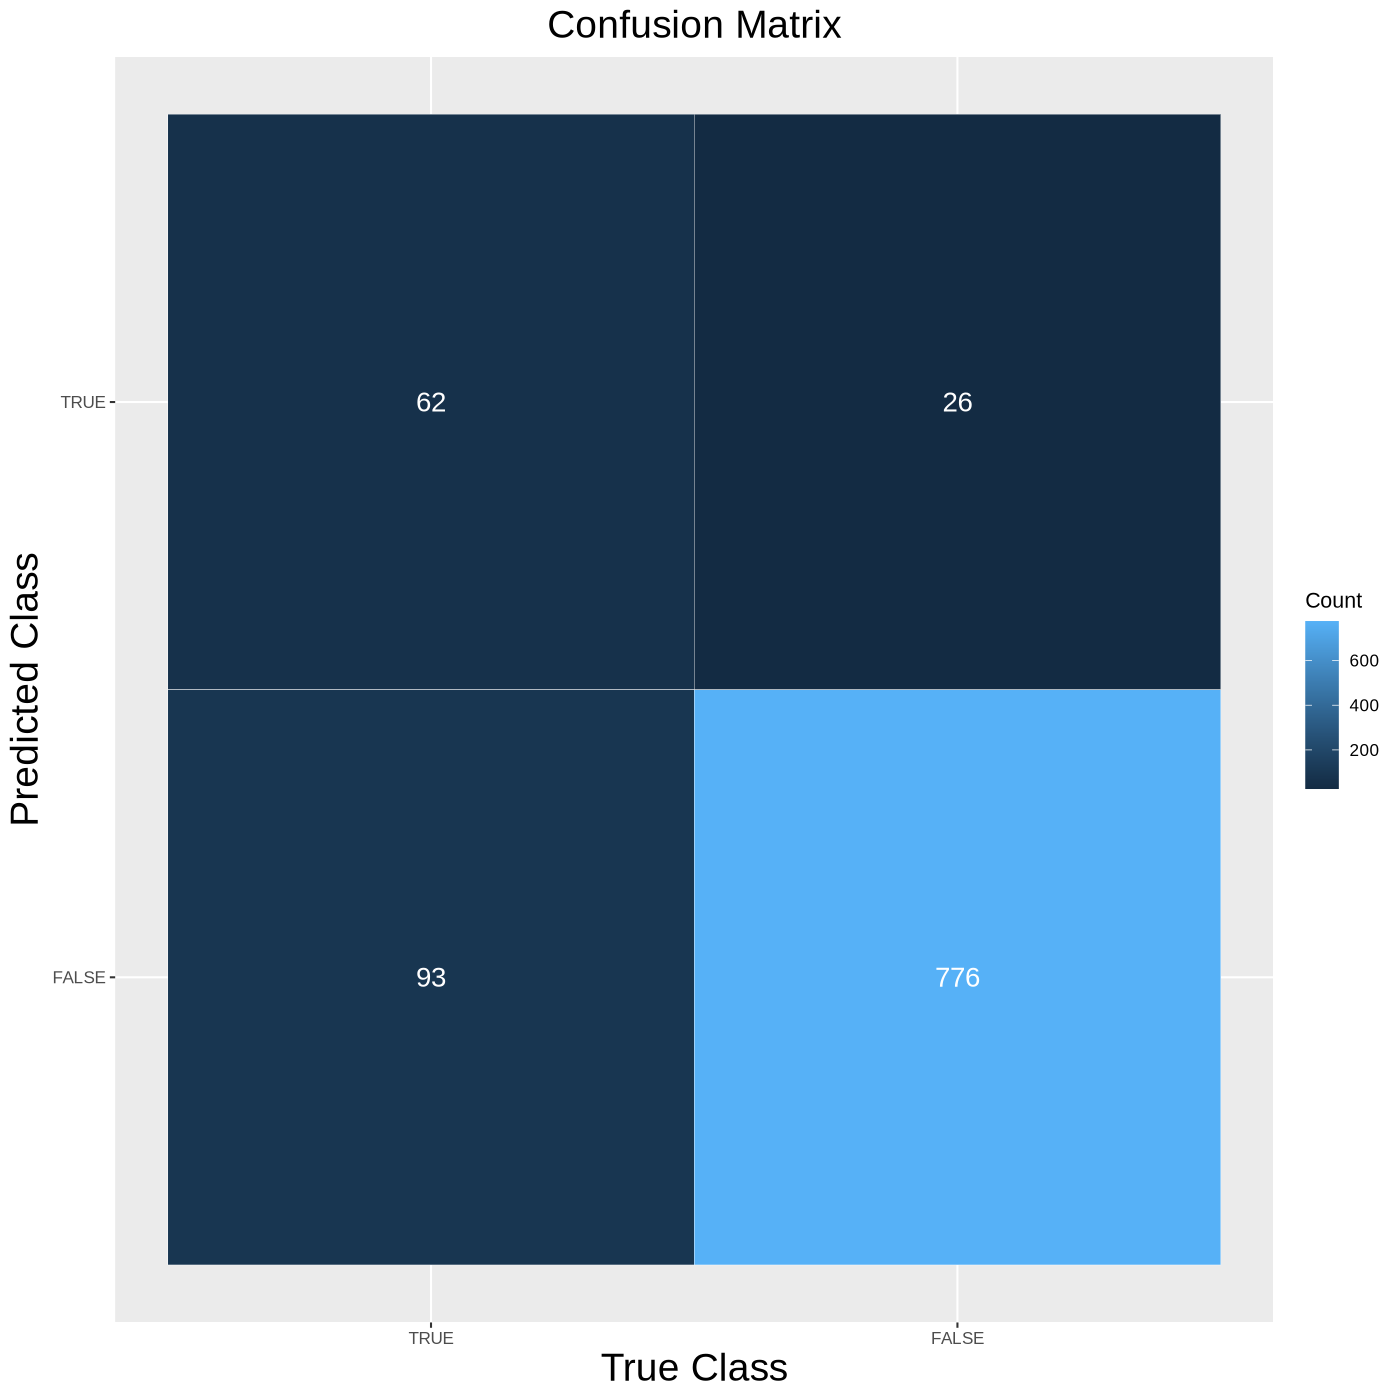

In [16]:
# make a confusion matrix table for visualization
conf_mat_table <- data.frame(
    True = rep(c("TRUE", "FALSE"), each = 2),
    Pred = rep(c("TRUE", "FALSE"), times = 2),
    Count = c(TP, FN, FP, TN)
)

# size the plot
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 140)

# define confusion matrix plot object
conf_mat <- ggplot(conf_mat_table, aes(x = factor(True, levels = c("TRUE", "FALSE")), y = Pred, fill = Count)) +
    geom_tile(color = "white") +
    geom_text(aes(label = Count), color = "white", size = 5) +
    labs(x = "True Class", y = "Predicted Class", title = "Confusion Matrix") +
    theme(plot.title = element_text(size = 20, hjust = 0.5),
          axis.title = element_text(size = 20))

# plot confusion matrix
conf_mat

## LASSO

In [17]:
tidy_data <- tidy_data %>%
    mutate(Revenue = as.numeric(Revenue))

In [18]:
training_data <- tidy_data %>%
    slice_sample(prop = 0.7, replace = FALSE)

testing_data <- tidy_data %>%
    slice_sample(prop = 0.3, replace = FALSE)

training_x <- model.matrix(~ . - 1, data = training_data[, -17])

training_y <- as.matrix(training_data[,17])

testing_x <- model.matrix(~ . - 1, data = testing_data[, -17])

testing_y <- as.matrix(testing_data[,17])


In [19]:
lasso_model <- 
  cv.glmnet(
      x = training_x,
      y = training_y,
       alpha = 1,
       family = "binomial",
      type.measure = "auc",
       nfolds = 10)
lasso_model


Call:  cv.glmnet(x = training_x, y = training_y, type.measure = "auc",      nfolds = 10, alpha = 1, family = "binomial") 

Measure: AUC 

     Lambda Index Measure      SE Nonzero
min 0.03611    18  0.8908 0.01042       4
1se 0.06311    12  0.8804 0.01254       2

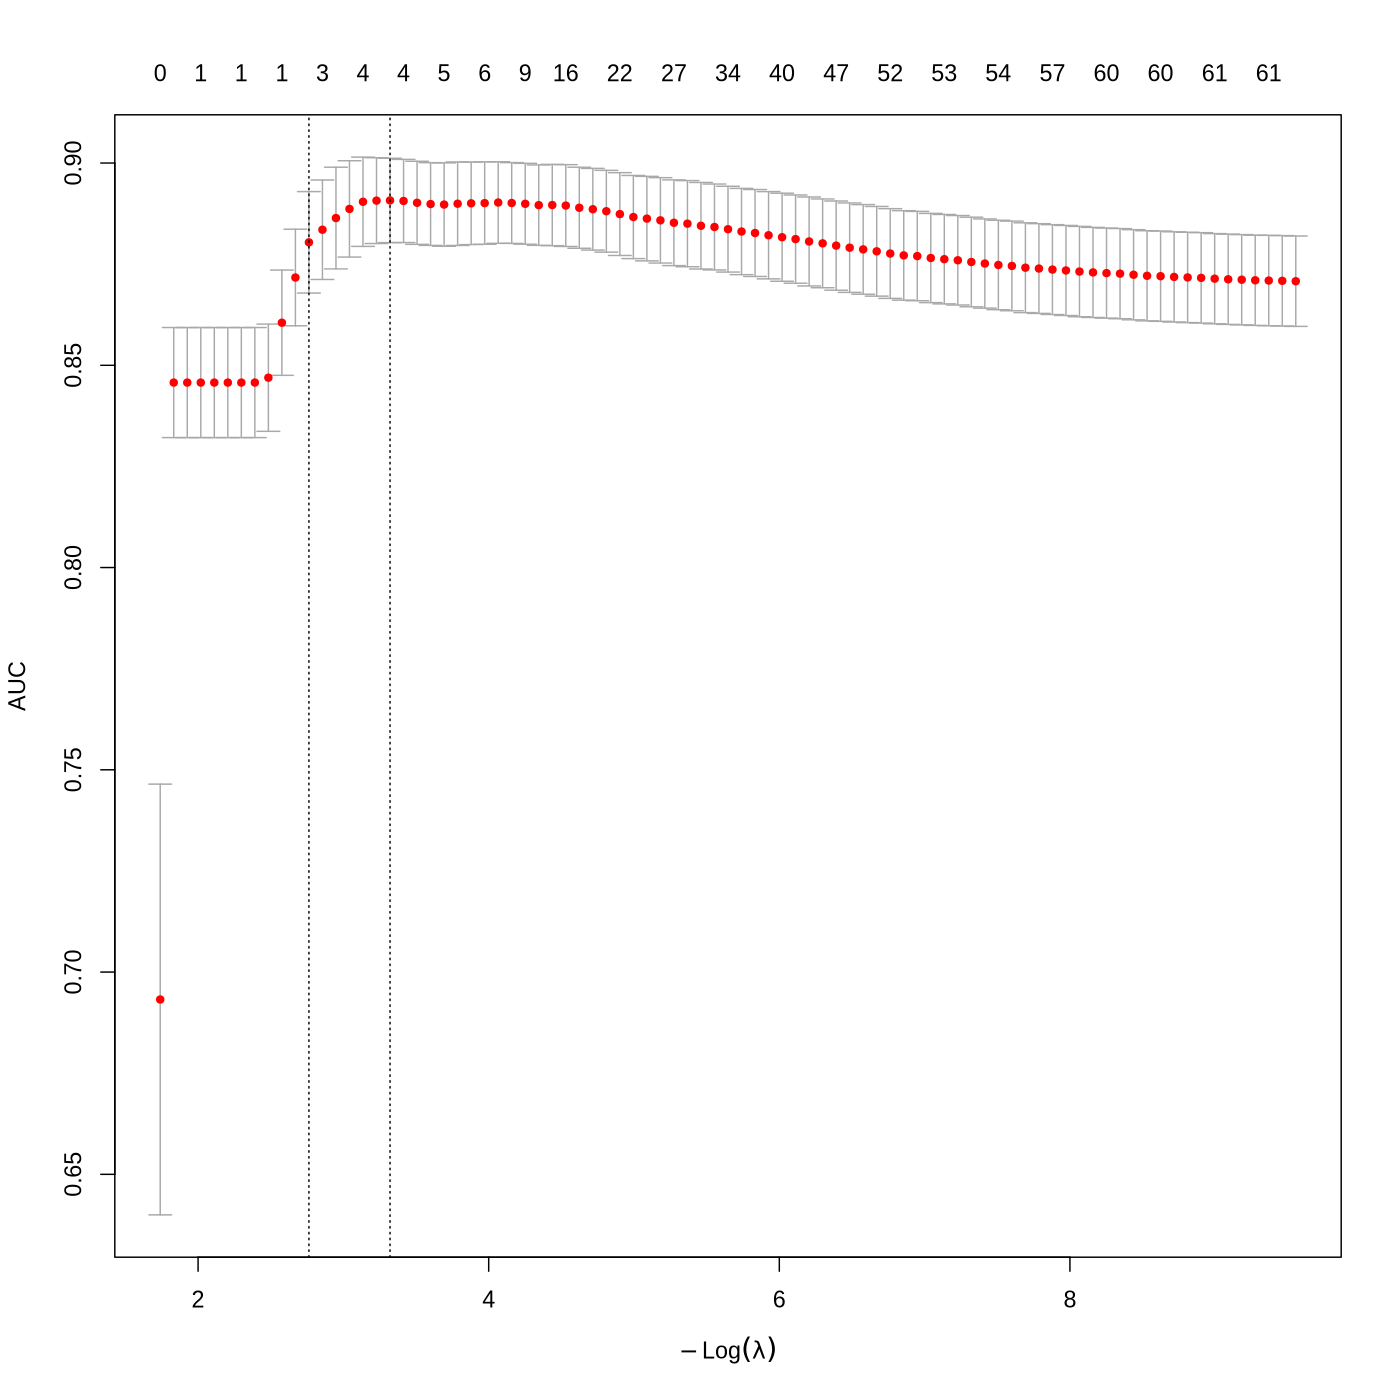

In [20]:
plot(lasso_model)

In [21]:
lambda_1se <- lasso_model$lambda.1se
lambda_1se

[1] 0.06311081

In [22]:
main_lasso <- glmnet(
    x = training_x,
    y = training_y,
    alpha = 1,
    family = "binomial",
    lambda = lambda_1se
)

In [23]:
coef(main_lasso)

63 x 1 sparse Matrix of class "dgCMatrix"
                                        s0
(Intercept)                  -1.9842127016
Administrative                .           
Administrative_Duration       .           
Informational                 .           
Informational_Duration        .           
ProductRelated                0.0009994669
ProductRelated_Duration       .           
BounceRates                   .           
ExitRates                     .           
PageValues                    0.0368199478
SpecialDay0                   .           
SpecialDay0.2                 .           
SpecialDay0.4                 .           
SpecialDay0.6                 .           
SpecialDay0.8                 .           
SpecialDay1                   .           
MonthDec                      .           
MonthFeb                      .           
MonthJul                      .           
MonthJune                     .           
MonthMar                      .           
MonthMay    

In [24]:
set.seed(2)
prediction <- predict(main_lasso,
                      newx = testing_x,
                      type = "response")
prediction

,s0
1,0.1430340
2,0.1858241
3,0.1238759
⋮,⋮
1432,0.1353709
1433,0.1225801
1434,0.1212959


In [25]:
predict_labels <- ifelse(prediction >= 0.5, 1, 0)
unique(predict_labels[,1])

[1] 0 1

In [29]:
confusion_matrix <- 
    confusionMatrix(
    data = as.factor(predict_labels),
    reference = as.factor(testing_data$Revenue),
    positive = "1"
)
confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1179  208
         1    7   40
                                          
               Accuracy : 0.8501          
                 95% CI : (0.8305, 0.8682)
    No Information Rate : 0.8271          
    P-Value [Acc > NIR] : 0.01064         
                                          
                  Kappa : 0.2287          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.16129         
            Specificity : 0.99410         
         Pos Pred Value : 0.85106         
         Neg Pred Value : 0.85004         
             Prevalence : 0.17294         
         Detection Rate : 0.02789         
   Detection Prevalence : 0.03278         
      Balanced Accuracy : 0.57769         
                                          
       'Positive' Class : 1               
                        

Setting levels: control = 0, case = 1

Warning message in roc.default(response = testing_data$Revenue, predictor = predict(main_lasso, :
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases



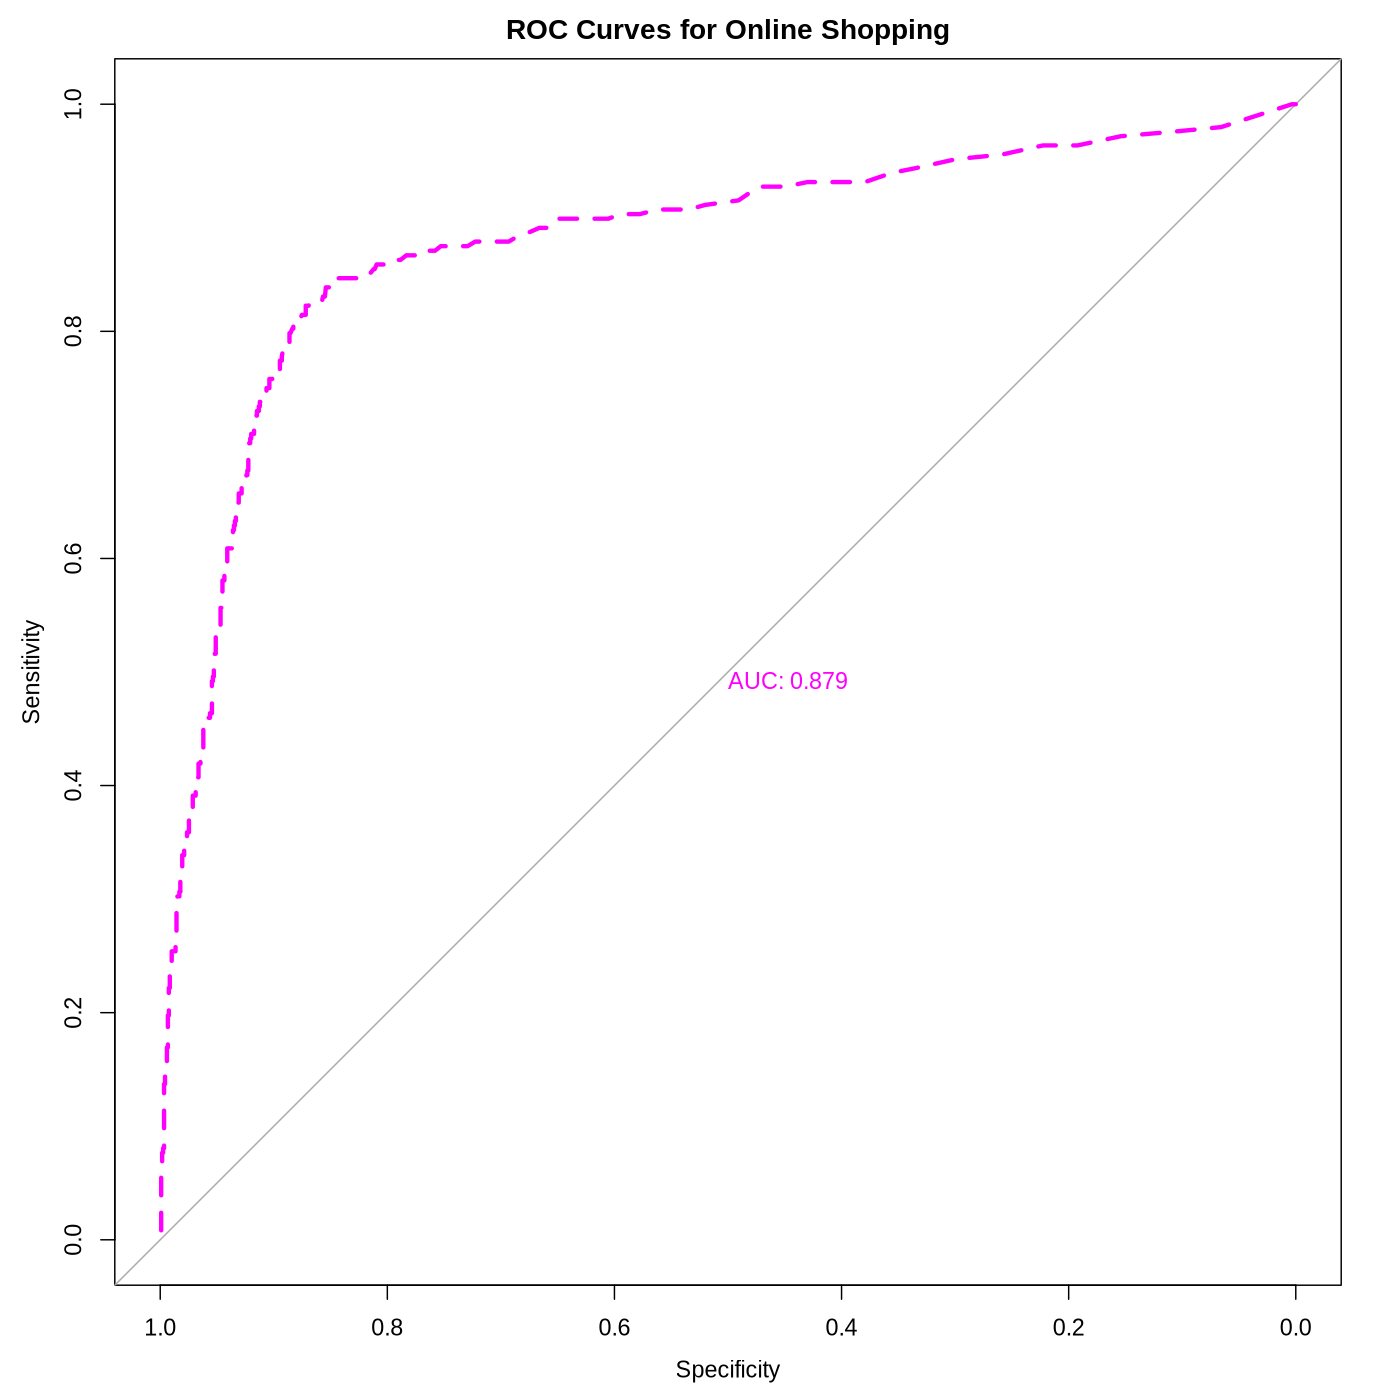

In [33]:
ROC_full_log <- roc(
  response = testing_data$Revenue,
  predictor = predict(main_lasso, newx = testing_x, type = "response")
)
plot(ROC_full_log,
  print.auc = TRUE, col = "magenta", lwd = 3, lty = 2,
  main = "ROC Curves for Online Shopping"
)

## Discussion

**Results:** Our goal was to predict the revenue and see which variables 


In this section, you’ll interpret and reflect on the results you obtained in the previous section with respect to the main question/goal of your project.

Summarize what you found and the implications/impact of your findings
If relevant, discuss whether your results were what you expected to find
Discuss how your model could be improved
Discuss future questions/research this study could lead to

**Logistic Regression Model**
- Since the model can correctly classify most test samples with a high accuracy of ~87.6%, we might interpret that the model has a fairly good performance and could answer my question by saying that predictors from user session analytics, user visited date, and visitor type could be used to predict the revenue.
- However, since the data here contains a severe class imbalance with much more false class than the true class, accuracy might not be a reliable metric for evaluating the overall test performance
- Especially, for the true revenue class, which is the minority class that has much less samples compared to the false revenue class, the model exhibits a significant degree of misclassification with a recall of 40% and 93 false negatives.
- Hence, it is highly recommended to apply upsampling or oversampling to address the class imbalance and re-examine whether the model built with such predictors can predict revenue with low test errors.

**LASSO Model**
- From the confusion matrix output one can see that the accuracy is ~85%. This indicates that the model has a fairly good performance and that we can answer our question of predicting revenue using the variables of Related Products and Page Values.
- The ROC Curve gave us an AUC of 0.879. This indicates that the model does a good job of differentiating between the classes of gaining revenue and not gaining revenue. The model has a 87.9% probability of correctly ranking a positive value (revenue gained) over a negative value (not gaining revenue).
- Since the AUC score is relatively high, one can see that the issue of class imbalance is not impacting our model very much; it can still differentiate between revenue and non-revenue
- However, to improve the model and ensure that class imbalance doesn't create an issue, we could use oversampling or upsampling to address this.
- Another issue with LASSO is that it can't deal with collinear variables. Therefore if there is multicollinearity using LASSO wouldn't give us any idea about that. 

#### Compare LASSO vs Logistic Regression